Thanks to: https://www.geeksforgeeks.org/python-count-occurrences-of-each-word-in-given-text-file-using-dictionary/ and numerous other samples and suggestions.

Thanks to Zamzar.com for file conversion services.

Thanks to Dr. Merlin Hanauer for samples and encouragement.

This program expects a group of text files containing SOTU text to coexist in the current working directory.
The naming convention will be "prezlname.year" so President Obama's 2011 address is "obama.2011"

3/7/2020:  Functionality complete through the simple scatterplot.  The dataframe 'merged_df' is ready for analysis.
con't:  I need to go back and parameterize this so I or other can specify two wordlists to compare in external text files to avoid having to modify the source code to run a different analysis.

3/10/2020: Now configured to get word lists from the text files 'x_words.txt' and 'y_words.txt', which more or less correspond to dependent and independent features or variables.  ***** to change the words being profiled, just edit those files and run the parsing routine *****

In [18]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# Thank to: geeksforgeeks
# 2/20/2020 this works, but with encoding glitches
# 3/10/2020 I'm fairly sure that the encoding glitches have been resolved

start_t = time.time()

if os.path.exists("sotu.csv"):
    os.remove("sotu.csv")
sotucsv = open("sotu.csv", "w")
# sometimes easier to import a csv into a dbms if the first row has headers
sotucsv.write("president,year,word,count" + '\n')

textdir = os.path.abspath("Text")

with os.scandir(textdir) as entries:
    for entry in entries:
        if entry.is_file():
            entry_str = str(entry)
            # parse the returned scandir entry
            trimmed_entry_str = entry_str[(entry_str.find("'")+1):entry_str.rfind("'")]
            entry_name = trimmed_entry_str[0:trimmed_entry_str.find('.')]
            entry_ext = trimmed_entry_str[trimmed_entry_str.find(".")+1:]
            # half a$$ed attempt to only read 'president.1234' files
            if entry_ext.isnumeric() and 1789 <= int(entry_ext) <=2100:   # if we last that long
                aFile = textdir + "/" + entry_name + '.' + entry_ext
                text = open( aFile, "r")
                worddict = {}
                # following is the implicit method for reading a text file line by line
                for line in text:
                    line = line.strip()
                    for punc in '",.;:?!-—_~\n':
                        line = line.replace(punc, '')
                    line = line.lower()
                    words = line.split(" ")
                    for word in words:
                        if word in worddict:
                            worddict[word] += 1
                        else:
                            worddict[word] = 1
                wordlist = [(k,v) for k, v in worddict.items()]
                for w, c in wordlist:
                    sotucsv.write(entry_name + ',' + entry_ext + ',' + w + ',' + str(c) + '\n')

sotucsv.close()
stop_t = time.time()
print("execution time: " + "%.2f" % ( stop_t - start_t) + " seconds. Text file ready for analysis")

execution time: 31.45 seconds. Text file ready for analysis


We now have text.csv containing: president, year, word, count

This is kind of a cool intermediate step as it throws off a text file in standard format that can be used by others in whatever toolset they prefer.

But for this analysis, it will be useful to stuff that data into a dataframe.

In [20]:
# create dataframe
start_t = time.time()

fulltext = pd.read_csv('sotu.csv', header=0, low_memory=False)

stop_t = time.time()
print("execution time: " + "%.2f" % ( stop_t - start_t) + " seconds.")

execution time: 3.91 seconds.


In [21]:
# initialy this xList will be singular first person pronounrs, but later by editing
# the text file 'x_words.txt' it could become independent variable group 'x'

xList = [line.rstrip('\n') for line in open('x_words.txt')]

x_df = pd.DataFrame(fulltext.loc[fulltext['word'].isin(xList)])

x_df['prez_yr'] = x_df.president + '_' + x_df.year.astype(str)
x_df.set_index(['prez_yr'], inplace=True)
x_df.sort_index(inplace=True)
#x_df.head(10)

x_pivot = x_df.pivot_table(index='prez_yr', columns='word', values='count', fill_value=0)
x_pivot['x_sum'] = x_pivot.sum(axis=1, skipna=True)
x_pivot.head(12)

word,i,me,mine,my,x_sum
prez_yr,,,,,
adams_j_1797,11,2,0,7,20
adams_j_1798,11,0,0,3,14
adams_j_1799,12,4,0,3,19
adams_j_1800,8,2,0,0,10
adams_jq_1825,12,0,0,6,18
adams_jq_1826,6,2,0,3,11
adams_jq_1827,3,3,0,4,10
adams_jq_1828,7,2,0,7,16
arthur_1881,65,11,0,20,96


In [24]:
len(x_pivot)

233

In [25]:
# initialy this yList will be plural first person pronouns, but later by editing
# the text file 'y_words.txt' it could become any dependent variablecomparison group 'y'

yList = [line.rstrip('\n') for line in open('y_words.txt')]

y_df = pd.DataFrame(fulltext.loc[fulltext['word'].isin(yList)])

y_df['prez_yr'] = y_df.president + '_' + y_df.year.astype(str)
y_df.set_index(['prez_yr'], inplace=True)
y_df.sort_index(inplace=True)
#y_df.head(10)

y_pivot = y_df.pivot_table(index='prez_yr', columns=['word'], values='count', fill_value=0)
y_pivot['y_sum'] = y_pivot.sum(axis=1, skipna=True)
y_pivot.head(12)


word,our,ours,us,we,y_sum
prez_yr,,,,,
adams_j_1797,20,0,2,5,27
adams_j_1798,26,0,3,18,47
adams_j_1799,18,0,1,3,22
adams_j_1800,23,0,5,4,32
adams_jq_1825,83,4,5,22,114
adams_jq_1826,72,2,12,31,117
adams_jq_1827,25,0,1,13,39
adams_jq_1828,66,1,8,19,94
arthur_1881,75,0,5,19,99


In [26]:
len(y_pivot)

233

In [28]:
xy_df = pd.merge(x_pivot, y_pivot, how='outer', on='prez_yr', sort=True, validate='m:m')
xy_df.head(12)
xy_df.head(12) # outliers are carter.1981 (332/827) and truman.1946 (157/432)

word,i,me,mine,my,x_sum,our,ours,us,we,y_sum
prez_yr,,,,,,,,,,
adams_j_1797,11,2,0,7,20,20,0,2,5,27
adams_j_1798,11,0,0,3,14,26,0,3,18,47
adams_j_1799,12,4,0,3,19,18,0,1,3,22
adams_j_1800,8,2,0,0,10,23,0,5,4,32
adams_jq_1825,12,0,0,6,18,83,4,5,22,114
adams_jq_1826,6,2,0,3,11,72,2,12,31,117
adams_jq_1827,3,3,0,4,10,25,0,1,13,39
adams_jq_1828,7,2,0,7,16,66,1,8,19,94
arthur_1881,65,11,0,20,96,75,0,5,19,99


In [29]:
len(xy_df)

233

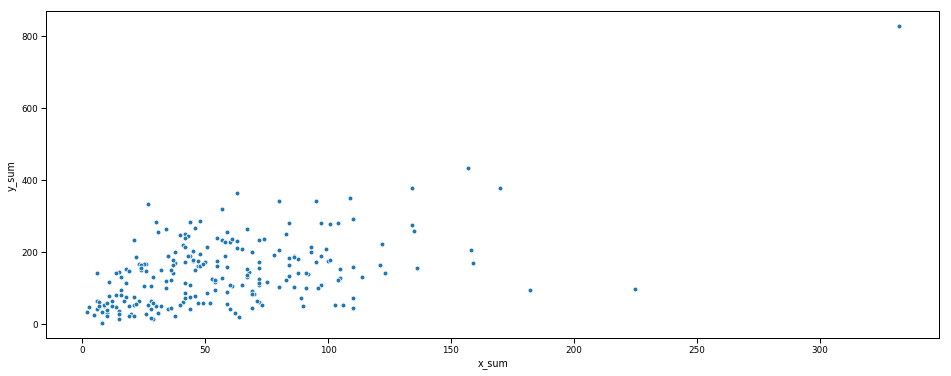

In [30]:
plt.figure(figsize=(16, 6))
sns.set_context('paper')
sns.scatterplot(x="x_sum", y="y_sum", data=xy_df)

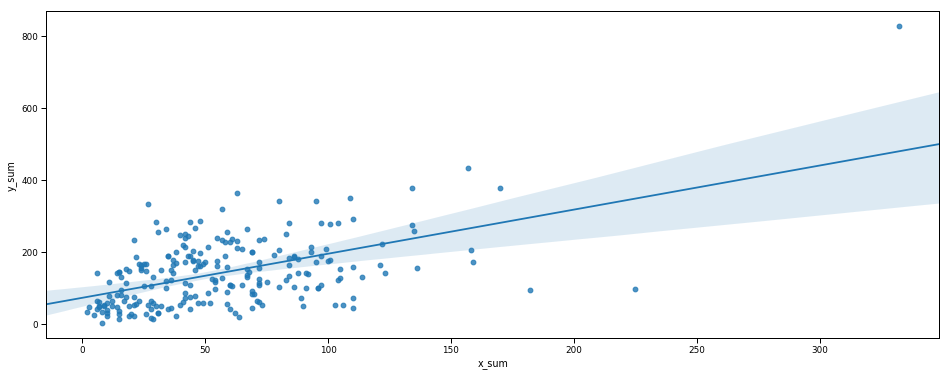

In [31]:
plt.figure(figsize=(16, 6))
sns.set_context('paper')
sns.regplot(x="x_sum", y="y_sum", data=xy_df)

In [36]:
def return_year(prezyr_string):
    return(prezyr_string[-4:])

xy_df['tmp'] = xy_df.index
xy_df.head(10)
xy_df['year'] = xy_df['tmp'].apply(return_year)
del(xy_df['tmp'])

xy_df['xy_ratio'] = xy_df['x_sum']/xy_df['y_sum']

xy_df.sort_values(by=['year'])

#xy_df.head(10)

word,i,me,mine,my,x_sum,our,ours,us,we,y_sum,year,xy_ratio
prez_yr,,,,,,,,,,,,
washington_1789,11,2,0,2,15,10,1,0,2,13,1789,1.153846
washington_1790,8,4,0,3,15,17,0,8,2,27,1790,0.555556
washington_1791,6,2,0,0,8,4,0,0,0,4,1791,2.000000
washington_1792,21,3,0,5,29,11,1,0,2,14,1792,2.071429
washington_1793,12,4,0,5,21,16,0,1,6,23,1793,0.913043
washington_1794,18,2,0,11,31,22,0,2,6,30,1794,1.033333
washington_1795,12,4,2,4,22,43,0,3,9,55,1795,0.400000
washington_1796,19,1,0,6,26,28,0,0,0,28,1796,0.928571
adams_j_1797,11,2,0,7,20,20,0,2,5,27,1797,0.740741


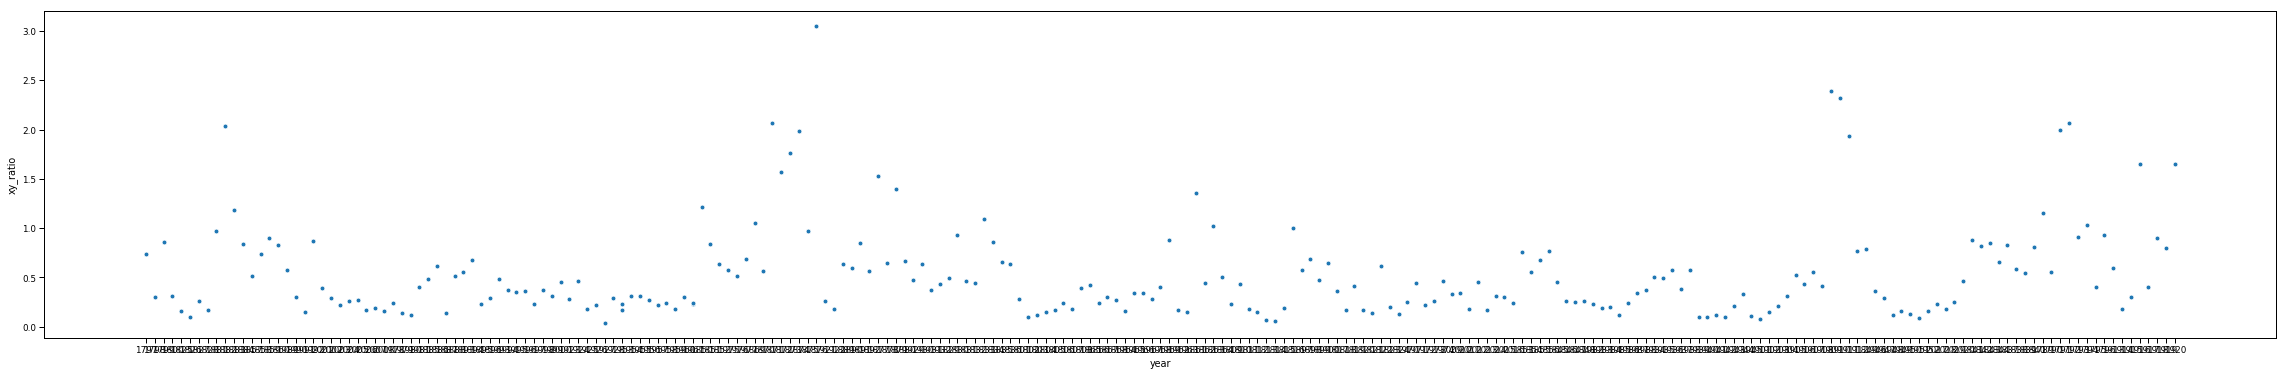

In [37]:
plt.figure(figsize=(40, 6))
sns.set_context('paper')
sns.scatterplot(x='year', y='xy_ratio', data=xy_df)

In [34]:
xy_df.to_csv('xy.csv')